# Giulio Cesare Mastrocinque Santo
### Write a Data Science Blog Post with Udacity and Aibnb

## Libraries

In [203]:
#Data
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer

#Inline Functions
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

Before start to work with data, let's point out the questions we want to answer as well as the insights we are expecting to reach:

- How do the prices varies over time? Is it possible to identify seasonal behaviours?
- Do the prices vary considerably from one city to another?
- What characteristics are most related to prices changes?
- Which variables most explains prices variance?
- Is it possible to predict the price for a certain home in a certain city?

## Gathering Data

#### In this project, data is being gathered from publicly available information from the Airbnb site.
- source: http://insideairbnb.com/get-the-data.html

Data is collected in the form of .csv files for both Seattle and Boston. For each city, the following files are being collected:
   - calendar.csv: contains booking data (such as date and availability).
   - listing.csv: contains detailed listings data.
   - reviews.csv: detailed reviews data for listings in the corresponding city.

In [73]:
#Gather CSV files
list_seat = pd.read_csv('Seattle/listings.csv',low_memory=False)
calend_seat = pd.read_csv('Seattle/calendar.csv',low_memory=False)
list_bost = pd.read_csv('Boston/listings.csv',low_memory=False)
calend_bost = pd.read_csv('Boston/calendar.csv',low_memory=False)

## Assessing Data

In [74]:
list_seat.shape

(8926, 106)

In [75]:
list_seat[list_seat['host_id']==8534462]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
624,3380159,https://www.airbnb.com/rooms/3380159,20190518113541,2019-05-18,Pike's Place. 100 Walkscore,This space features classic and modern interio...,NaN,This space features classic and modern interio...,none,NaN,We offer complimentary upgrades to our regular...,NaN,NaN,We are available to assist you with absolutely...,- You agree to the following: - - CHECK-IN: i...,NaN,NaN,https://a0.muscache.com/im/pictures/eaaafc9c-6...,NaN,8534462,https://www.airbnb.com/users/show/8534462,Corp Condos & Apts,2013-08-30,"Seattle, Washington, United States",We are a passionate team running a modern tech...,within an hour,99%,NaN,f,https://a0.muscache.com/im/pictures/user/3f3e3...,https://a0.muscache.com/im/pictures/user/3f3e3...,Pike Place Market,953.0,953.0,"['email', 'phone', 'facebook', 'jumio', 'offli...",t,f,"Seattle, WA, United States",Pike Place Market,Pike-Market,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.60969,-122.34200,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",600.0,$159.00,"$1,700.00","$5,000.00",$500.00,$89.00,2,$30.00,2,1125,1,3,1125,1125,2.8,1125.0,today,t,11,33,63,152,2019-05-18,105,20,2014-07-01,2019-05-03,92.0,9.0,9.0,9.0,9.0,10.0,9.0,f,NaN,{WASHINGTON},t,f,strict,t,t,380,380,0,0,1.77
727,3868138,https://www.airbnb.com/rooms/3868138,20190518113541,2019-05-18,Pike's Place. 98 Walkscore 1BD,This space features classic and modern interio...,NaN,This space features classic and modern interio...,none,NaN,We offer complimentary upgrades to our regular...,NaN,NaN,We are available to assist you with absolutely...,- You agree to the following: - - CHECK-IN: i...,NaN,NaN,https://a0.muscache.com/im/pictures/6fe9f91d-8...,NaN,8534462,https://www.airbnb.com/users/show/8534462,Corp Condos & Apts,2013-08-30,"Seattle, Washington, United States",We are a passionate team running a modern tech...,within an hour,99%,NaN,f,https://a0.muscache.com/im/pictures/user/3f3e3...,https://a0.muscache.com/im/pictures/user/3f3e3...,Pike Place Market,953.0,953.0,"['email', 'phone', 'facebook', 'jumio', 'offli...",t,f,"Seattle, WA, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98104,Seattle,"Seattle, WA",US,United States,47.6

In [76]:
list_seat.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190518113541,2019-05-18,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,four day minimum stay,NaN,NaN,https://a0.muscache.com/im/pictures/f179d75f-c...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/55737...,https://a0.muscache.com/im/pictures/user/55737...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,4,1000,4,4,1000,1000,4.0,1000.0,a week ago,t,12,41,66,336,2019-05-18,25,9,2008-09-15,2019-04-19,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
1,5682,https://www.airbnb.com/rooms/5682,20190518113541,2019-05-18,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,"['email', 'phone

In [77]:
calend_seat.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2019-05-18,f,$375.00,$375.00,4,1000
1,2318,2019-05-19,f,$375.00,$375.00,4,1000


In [78]:
list_bost.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190519014616,2019-05-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,89%,NaN,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,4,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36524,-71.02936,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,30,1125,30,30,1125,1125,30.0,1125.0,6 weeks ago,t,4,4,18,107,2019-05-19,15,2,2015-07-10,2019-02-22,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.32
1,5506,https://www.airbnb.com/rooms/5506,20190519014616,2019-05-19,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,

In [79]:
calend_bost.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2019-05-19,f,$125.00,$125.00,30,1125
1,3781,2019-05-20,f,$125.00,$125.00,30,1125


#### Variables in the listing dataframes

In [80]:
list(list_seat.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


#### Variables in the calendar dataframes

In [81]:
list(calend_seat.columns)

['listing_id',
 'date',
 'available',
 'price',
 'adjusted_price',
 'minimum_nights',
 'maximum_nights']

In [208]:
list_seat['host_response_rate']

0       100%
1        NaN
2       100%
3       100%
4       100%
5       100%
6       100%
7       100%
8       100%
9        90%
10      100%
11       94%
12       94%
13      100%
14      100%
15       99%
16      100%
17      100%
18      100%
19      100%
20       99%
21      100%
22      100%
23      100%
24      100%
25        0%
26      100%
27       NaN
28      100%
29      100%
        ... 
8896     99%
8897    100%
8898     NaN
8899    100%
8900     40%
8901    100%
8902    100%
8903    100%
8904    100%
8905    100%
8906    100%
8907    100%
8908     NaN
8909    100%
8910    100%
8911    100%
8912     NaN
8913    100%
8914    100%
8915    100%
8916     NaN
8917     86%
8918    100%
8919     NaN
8920     NaN
8921    100%
8922    100%
8923     NaN
8924    100%
8925     NaN
Name: host_response_rate, Length: 8926, dtype: object

### Investigating these columns, the following ones seems to allow one to analyze house prices in each city:

- **host_since**: how long the owner is a host
- **host_response_time**: how long it takes for the owner to respond
- **host_response_rate**: how good is the host in answering the costumers.
- **host_is_superhost**: whether the owner is a superhost or not
- **host_has_profile_pic**: whether the owner has a profile picture
- **host_verifications**: the owner verifications
- **host_identity_verified**: whether the owner has its identity verified
- **street**: the house street
- **neighbourhood**: the house neighbourhood
- **zipcode**: the house zipcode
- **room_type**: the house room type
- **accommodates**: how many people the house acommodates
- **bathrooms**: the number of bathrooms in the house
- **bedrooms**: the number of badrooms in the house
- **beds**: the number of beds in the house
- **amenities**: which amenities the house contains (ex: wi-fi)
- **square_feet**: the house size in square feet
- **guests_included**: how many guests are accepted
- **extra_people**: the price per extra person
- **minimum_nights**: the minimum number of nights
- **maximum_nights**: the maximum number of nights
- **availability_30**: how many available days in a window of 30 days
- **availability_60**: how many available days in a window of 60 days
- **availability_90**: how many available days in a window of 90 days
- **availability_365**: how many available days in a window of a year
- **number_of_reviews**: the number of reviews for the particular house
- **review_scores_rating**: the rating score
- **review_scores_accuracy**: the accuracy score
- **review_scores_cleanliness**: the cleanliness score
- **review_scores_checkin**: the checkin score
- **review_scores_communication**: the communication score
- **review_scores_location**: the location score
- **review_scores_value**: the value score
- **require_guest_profile_picture**: whether the guest must have a profile picture or not
- **reviews_per_month**: the average number of reviews per month
- **date**: the date when a certain house was being announced

In [82]:
list_attributes = ['id',
                   'host_since',
                   'host_response_time',
                   'host_response_rate',
                   'host_is_superhost',
                   'host_has_profile_pic',
                   'host_identity_verified',
                   'street',
                   'neighbourhood',
                   'neighbourhood_cleansed',
                   'room_type',
                   'accommodates',
                   'bathrooms',
                   'bedrooms',
                   'beds',
                   'amenities',
                   'square_feet',
                   'guests_included',
                   'extra_people',
                   'minimum_nights',
                   'maximum_nights',
                   'availability_30',
                   'availability_60',
                   'availability_90',
                   'availability_365',
                   'number_of_reviews',
                   'review_scores_rating',
                   'review_scores_accuracy',
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                   'review_scores_location',
                   'review_scores_value',
                   'require_guest_profile_picture',
                   'reviews_per_month',
                   'price']

calend_attributes = ['listing_id','date','price','adjusted_price']

In [83]:
list_seat = list_seat[list_attributes]
calend_seat = calend_seat[calend_attributes]
list_bost = list_bost[list_attributes]
calend_bost = calend_bost[calend_attributes]

## Assessing

In [84]:
list_seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 36 columns):
id                               8926 non-null int64
host_since                       8924 non-null object
host_response_time               7207 non-null object
host_response_rate               7207 non-null object
host_is_superhost                8924 non-null object
host_has_profile_pic             8924 non-null object
host_identity_verified           8924 non-null object
street                           8926 non-null object
neighbourhood                    8926 non-null object
neighbourhood_cleansed           8926 non-null object
room_type                        8926 non-null object
accommodates                     8926 non-null int64
bathrooms                        8925 non-null float64
bedrooms                         8924 non-null float64
beds                             8924 non-null float64
amenities                        8926 non-null object
square_feet                 

In [85]:
calend_seat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257990 entries, 0 to 3257989
Data columns (total 4 columns):
listing_id        int64
date              object
price             object
adjusted_price    object
dtypes: int64(1), object(3)
memory usage: 99.4+ MB


In [86]:
list_seat['host_since'].head()

0    2008-08-26
1    2009-03-03
2    2009-04-26
3    2009-08-09
4    2009-08-10
Name: host_since, dtype: object

In [87]:
list_seat['host_response_rate'].head()

0    100%
1     NaN
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

In [88]:
list_seat['host_response_time'].head()

0    within an hour
1               NaN
2    within an hour
3    within an hour
4    within an hour
Name: host_response_time, dtype: object

In [89]:
list_seat['host_is_superhost'].head()

0    t
1    t
2    t
3    t
4    t
Name: host_is_superhost, dtype: object

In [90]:
list_seat['host_has_profile_pic'].head()

0    t
1    t
2    t
3    t
4    t
Name: host_has_profile_pic, dtype: object

In [91]:
list_seat['host_identity_verified'].head()

0    t
1    t
2    t
3    t
4    f
Name: host_identity_verified, dtype: object

In [92]:
list_seat['street'].head()

0    Seattle, WA, United States
1    Seattle, WA, United States
2    Seattle, WA, United States
3    Seattle, WA, United States
4    Seattle, WA, United States
Name: street, dtype: object

In [93]:
list_seat['street'].value_counts()

Seattle, WA, United States                    8897
Seattle, United States                          11
Shoreline, WA, United States                     3
Lake Forest Park, WA, United States              3
Seattle , WA, United States                      2
Ballard, Seattle, WA, United States              1
Ballard Seattle, WA, United States               1
西雅图, WA, United States                           1
Tukwila, WA, United States                       1
Redmond, WA, United States                       1
Seattle, Wa, United States                       1
West Seattle, WA, United States                  1
WA, WA, United States                            1
Capitol Hill, Seattle, WA, United States         1
Seattle, Washington, US, WA, United States       1
Name: street, dtype: int64

In [94]:
list_seat['neighbourhood'].head(15)

0            Madrona
1     South Delridge
2        Wallingford
3         Georgetown
4         First Hill
5       The Junction
6       The Junction
7        Wallingford
8       The Junction
9         High Point
10       Wallingford
11        Green Lake
12        Green Lake
13        Green Lake
14      The Junction
Name: neighbourhood, dtype: object

In [95]:
list_seat['neighbourhood_cleansed'].head(15)

0            Madrona
1     South Delridge
2        Wallingford
3         Georgetown
4         First Hill
5     Fairmount Park
6     Fairmount Park
7        Wallingford
8     Fairmount Park
9         High Point
10       Wallingford
11        Green Lake
12        Green Lake
13        Green Lake
14    Fairmount Park
Name: neighbourhood_cleansed, dtype: object

In [96]:
list_seat['room_type'].value_counts()

Entire home/apt    6776
Private room       1968
Shared room         182
Name: room_type, dtype: int64

In [97]:
list_seat['accommodates'].head()

0    9
1    2
2    2
3    2
4    2
Name: accommodates, dtype: int64

In [98]:
list_seat['bathrooms'].head()

0    2.5
1    1.0
2    1.0
3    3.0
4    1.0
Name: bathrooms, dtype: float64

In [99]:
list_seat['bedrooms'].head()

0    4.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: bedrooms, dtype: float64

In [100]:
list_seat['beds'].head()

0    4.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: beds, dtype: float64

In [101]:
list_seat['amenities'].value_counts()[:10]

{TV,Internet,Wifi,Kitchen,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Self check-in","Smart lock"}                                                                                                                                                                                      81
{TV,Internet,Wifi,Kitchen,"Pets allowed",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private entrance"}                                                                                                                                                                                                                                      65
{TV,Internet,Wifi,"Air conditioning",Kitchen,Gym,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide det

In [102]:
list_seat['square_feet'].head()

0      NaN
1      NaN
2      NaN
3    200.0
4      NaN
Name: square_feet, dtype: float64

In [103]:
list_seat['guests_included'].head()

0    8
1    1
2    2
3    1
4    1
Name: guests_included, dtype: int64

In [104]:
list_seat['extra_people'].head()

0    $25.00
1     $5.00
2    $10.00
3    $15.00
4    $15.00
Name: extra_people, dtype: object

In [105]:
list_seat['minimum_nights'].head()

0    4
1    3
2    2
3    2
4    3
Name: minimum_nights, dtype: int64

In [106]:
list_seat['maximum_nights'].head()

0    1000
1      14
2    1125
3      60
4      29
Name: maximum_nights, dtype: int64

In [107]:
list_seat['maximum_nights'].head()

0    1000
1      14
2    1125
3      60
4      29
Name: maximum_nights, dtype: int64

In [108]:
list_seat['availability_30'].head(5)

0    12
1     0
2     9
3     2
4     7
Name: availability_30, dtype: int64

In [109]:
list_seat['availability_60'].head(5)

0    41
1     0
2    17
3    29
4    14
Name: availability_60, dtype: int64

In [110]:
list_seat['availability_90'].head(5)

0    66
1     0
2    40
3    55
4    20
Name: availability_90, dtype: int64

In [111]:
list_seat['availability_365'].head(5)

0    336
1      0
2    130
3    330
4    122
Name: availability_365, dtype: int64

In [112]:
list_seat['number_of_reviews'].head(5)

0     25
1    462
2    136
3    133
4    421
Name: number_of_reviews, dtype: int64

In [113]:
list_seat['review_scores_rating'].head(5)

0    100.0
1     95.0
2     93.0
3     92.0
4     98.0
Name: review_scores_rating, dtype: float64

In [114]:
list_seat['review_scores_accuracy'].head(5)

0    10.0
1    10.0
2     9.0
3    10.0
4    10.0
Name: review_scores_accuracy, dtype: float64

In [115]:
list_seat['review_scores_cleanliness'].head(5)

0    10.0
1    10.0
2     9.0
3    10.0
4    10.0
Name: review_scores_cleanliness, dtype: float64

In [116]:
list_seat['review_scores_checkin'].head(5)

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: review_scores_checkin, dtype: float64

In [117]:
list_seat['review_scores_communication'].head(5)

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: review_scores_communication, dtype: float64

In [118]:
list_seat['review_scores_location'].head(5)

0    10.0
1     9.0
2    10.0
3    10.0
4    10.0
Name: review_scores_location, dtype: float64

In [119]:
list_seat['review_scores_value'].head(5)

0    10.0
1    10.0
2     9.0
3     9.0
4    10.0
Name: review_scores_value, dtype: float64

In [120]:
list_seat['require_guest_profile_picture'].head(5)

0    f
1    f
2    f
3    t
4    f
Name: require_guest_profile_picture, dtype: object

In [121]:
list_seat['reviews_per_month'].head(5)

0    0.19
1    4.14
2    1.14
3    1.24
4    3.56
Name: reviews_per_month, dtype: float64

In [122]:
calend_seat['date'].head()

0    2019-05-18
1    2019-05-19
2    2019-05-20
3    2019-05-21
4    2019-05-22
Name: date, dtype: object

#### During assessing, the following issues were detected:

#### Quality
- host_since: it is a string. Can be converted to a time range
- host_response_rate: it is a string object with character %. Must be converted to float
- host_is_superhost: it is a string with t and f. Must be converted to 0 and 1
- host_has_profile_pic: it is a string with t and f. Must be converted to 0 and 1
- host_identity_verified: it is a string with t and f. Must be converted to 0 and 1
- street: many variations for the same information (ex: Seattle appears many times with different variations). Only the first part of the name can be take (befor the ,).
- neighbourhood: values are being repeted. Remove white spaces, normalize everything to lowercase letters.
- neighbourhood_cleansed: column must be removed (same information as neighbourhood)
- room_type: replace white spaces and / by _. Normalyze to lowercase letters.
- amenities: the amenities are mixed into strings, being impossible to use as a feature without transformations.
- extra_people: it is a string object with character %. Must be converted to float
- require_guest_profile_picture: it is a string with t and f. Must be converted to 0 and 1
- square_feet: lots of missing values. Remove column
- date: convert do pd.datetime
- price: it is a string object with character %. Must be converted to float

#### Tidness
- host_response_time: must be one-hot encoded (each variable is a column)
- neighbourhood: must be one-hot encoded (each variable is a column)
- room_type: must be one-hot encoded (each variable is a column)
- amenities: each variable in the list must be converted into a column. Select only most common values to reduce number of features.

## Cleaning Data

#### Lets create a copy of the dataframes

In [123]:
list_seat_clean = list_seat.copy()
calend_seat_clean = calend_seat.copy()
list_bost_clean = list_bost.copy()
calend_bost_clean = calend_bost.copy()

### Quality issues

`host_since`: convert attribute to time range

In [124]:
#Remove rows with missing values
list_seat_clean.dropna(subset=['host_since'],axis=0,inplace=True)
list_bost_clean.dropna(subset=['host_since'],axis=0,inplace=True)

In [125]:
#Convert date to date time
list_seat_clean['host_since'] = pd.to_datetime(list_seat_clean['host_since'])
list_bost_clean['host_since'] = pd.to_datetime(list_bost_clean['host_since'])

In [126]:
def convert_to_time_range(date):
    """
    This function converts a date to a time range in months based on the current date.
    
    Arguments:
        date: a given date
    
    Output:
        num_months: the number of months from date until today
    """
    today = pd.Timestamp.today()
    
    num_months = 12*(today.year - date.year) + (today.month - date.month)
    
    return num_months

In [127]:
list_seat_clean['host_since_month'] = list_seat_clean['host_since'].apply(convert_to_time_range)

In [128]:
list_bost_clean['host_since_month'] = list_bost_clean['host_since'].apply(convert_to_time_range)

In [129]:
list_seat_clean['host_since_month'].head(2)

0    131
1    124
Name: host_since_month, dtype: int64

In [130]:
list_bost_clean['host_since_month'].head(2)

0    127
1    125
Name: host_since_month, dtype: int64

In [131]:
#Drop host_since
list_seat_clean.drop(columns=['host_since'],axis=1,inplace=True)
list_bost_clean.drop(columns=['host_since'],axis=1,inplace=True)

`host_response_rate`: remove % and convert to float

In [132]:
def string_percentage_to_float(percentage_string):
    """
    This function converts a percentage value given as a string with a % symbol
    into a float value.
    
    Arguments:
        percentage_string: the string percentage value
        
    Output:
        percentage_value: the float equivalent value
    """
    
    if type(percentage_string) == str:
        percentage_value = percentage_string.replace("%","")
        percentage_value = float(percentage_value)
        return percentage_value
    else:
        return np.nan

In [133]:
list_seat_clean['host_response_rate'] = list_seat_clean['host_response_rate'].apply(string_percentage_to_float)
list_bost_clean['host_response_rate'] = list_bost_clean['host_response_rate'].apply(string_percentage_to_float)

In [134]:
list_seat_clean['host_response_rate'].head(2)

0    100.0
1      NaN
Name: host_response_rate, dtype: float64

In [135]:
list_bost_clean['host_response_rate'].head(2)

0     89.0
1    100.0
Name: host_response_rate, dtype: float64

In [136]:
list_seat_clean['host_response_rate'].max()

100.0

In [137]:
list_seat_clean['host_response_rate'].min()

0.0

`host_is_superhost`: convert "f" to 0 and "t" to 1

In [138]:
def convert_t_f_to_1_0(value):
    """
    This function converts the string f (false) into 0
    and the string t (true) into 1.
    
    Arguments:
        value: the string value
    
    Output:
        int_value: the string equivalent integer
    """
    if value == 'f':
        int_value = 0
    elif value == 't':
        int_value = 1
    else:
        int_value = np.nan
    
    return int_value

In [139]:
list_seat_clean['host_is_superhost'] = list_seat_clean['host_is_superhost'].apply(convert_t_f_to_1_0)
list_bost_clean['host_is_superhost'] = list_bost_clean['host_is_superhost'].apply(convert_t_f_to_1_0)

In [140]:
list_seat_clean['host_is_superhost'].head(2)

0    1
1    1
Name: host_is_superhost, dtype: int64

In [141]:
list_bost_clean['host_is_superhost'].head(2)

0    1
1    1
Name: host_is_superhost, dtype: int64

`host_has_profile_pic`: convert "f" to 0 and "t" to 1

In [142]:
list_seat_clean['host_has_profile_pic'] = list_seat_clean['host_has_profile_pic'].apply(convert_t_f_to_1_0)
list_bost_clean['host_has_profile_pic'] = list_bost_clean['host_has_profile_pic'].apply(convert_t_f_to_1_0)

In [143]:
list_seat_clean['host_has_profile_pic'].head(2)

0    1
1    1
Name: host_has_profile_pic, dtype: int64

In [144]:
list_bost_clean['host_has_profile_pic'].head(2)

0    1
1    1
Name: host_has_profile_pic, dtype: int64

`host_identity_verified`: convert "f" to 0 and "t" to 1

In [145]:
list_seat_clean['host_identity_verified'] = list_seat_clean['host_identity_verified'].apply(convert_t_f_to_1_0)
list_bost_clean['host_identity_verified'] = list_bost_clean['host_identity_verified'].apply(convert_t_f_to_1_0)

In [146]:
list_seat_clean['host_identity_verified'].head(2)

0    1
1    1
Name: host_identity_verified, dtype: int64

In [147]:
list_bost_clean['host_identity_verified'].head(2)

0    0
1    1
Name: host_identity_verified, dtype: int64

`street`: take only the values before the first ',', remove white spaces and transform to lower case

In [148]:
#Take values before first ','
list_seat_clean['street'] = list_seat_clean['street'].apply(lambda x: x.split(',')[0])
list_bost_clean['street'] = list_bost_clean['street'].apply(lambda x: x.split(',')[0])

#Transform string to lower case
list_seat_clean['street'] = list_seat_clean['street'].apply(lambda x: x.lower())
list_bost_clean['street'] = list_bost_clean['street'].apply(lambda x: x.lower())

#Remove white spaces
list_seat_clean['street'] = list_seat_clean['street'].apply(lambda x: x.replace(" ",""))
list_bost_clean['street'] = list_bost_clean['street'].apply(lambda x: x.replace(" ",""))

In [149]:
list_seat_clean['street'].value_counts()

seattle           8910
shoreline            3
lakeforestpark       3
westseattle          1
wa                   1
redmond              1
西雅图                  1
tukwila              1
capitolhill          1
ballardseattle       1
ballard              1
Name: street, dtype: int64

In [150]:
list_bost_clean['street'].value_counts()

boston                  6023
dorchester                43
roxburycrossing           29
jamaicaplain              16
somerville                14
charlestown               14
brighton                  13
brookline                 12
ma                        10
eastboston                 9
allston                    7
cambridge                  6
westroxbury                6
hydepark                   5
roslindale                 5
everett                    5
dorchestrctr               4
milton                     4
roxbury                    3
波士顿                        3
dorchster                  2
dorchestercenter           1
southboston                1
boston(charlestown)        1
mattapan                   1
revere                     1
us                         1
boston(jamaicaplain)       1
newton                     1
Name: street, dtype: int64

**Notice: The street is basically the name of the city. Since these values are almost a constant, I will be removing them.**

In [151]:
list_seat_clean.drop(columns=['street'],axis=1,inplace=True)
list_bost_clean.drop(columns=['street'],axis=1,inplace=True)

`neighbourhood`: remove white spaces and normalize everything to lowercase letters

In [152]:
#Transform string to lower case
list_seat_clean['neighbourhood'] = list_seat_clean['neighbourhood'].apply(lambda x: x.lower())
list_bost_clean['neighbourhood'] = list_bost_clean['neighbourhood'].apply(lambda x: x.lower())

#Remove white spaces
list_seat_clean['neighbourhood'] = list_seat_clean['neighbourhood'].apply(lambda x: x.replace(" ",""))
list_bost_clean['neighbourhood'] = list_bost_clean['neighbourhood'].apply(lambda x: x.replace(" ",""))

In [153]:
#Verification
assert list_seat_clean['neighbourhood'].nunique() == len(list_seat_clean['neighbourhood'].value_counts())
assert list_bost_clean['neighbourhood'].nunique() == len(list_bost_clean['neighbourhood'].value_counts())

`neighbourhood_cleansed`: drop this column (we already have the neighbourhood column)

In [154]:
list_seat_clean.drop(columns=['neighbourhood_cleansed'],axis=1,inplace=True)
list_bost_clean.drop(columns=['neighbourhood_cleansed'],axis=1,inplace=True)

In [155]:
#Verification
assert 'neighbourhood_cleansed' not in list_seat_clean.columns
assert 'neighbourhood_cleansed' not in list_bost_clean.columns

`room_type`: replace white spaces and '/' by '_' and transform the string into lower case letter

In [156]:
#Replace '/' by '_'
list_seat_clean['room_type'] = list_seat_clean['room_type'].apply(lambda x: x.replace("/","_"))
list_bost_clean['room_type'] = list_bost_clean['room_type'].apply(lambda x: x.replace("/","_"))

#Replace white space by '_'
list_seat_clean['room_type'] = list_seat_clean['room_type'].apply(lambda x: x.replace(" ","_"))
list_bost_clean['room_type'] = list_bost_clean['room_type'].apply(lambda x: x.replace(" ","_"))

#Transform to lower case
list_seat_clean['room_type'] = list_seat_clean['room_type'].apply(lambda x: x.lower())
list_bost_clean['room_type'] = list_bost_clean['room_type'].apply(lambda x: x.lower())

In [157]:
list_seat_clean['room_type'].value_counts()

entire_home_apt    6774
private_room       1968
shared_room         182
Name: room_type, dtype: int64

In [158]:
list_bost_clean['room_type'].value_counts()

entire_home_apt    4017
private_room       2157
shared_room          67
Name: room_type, dtype: int64

`amenities`: convert string into list of unique elements.

In [159]:
def create_set_of_amenities(value):
    """
    This function make transformations in the feature amenities
    in order to create a set of unique elements.
    
    Arguments:
        value: a amenities string from the dataset
        
    Output:
        list_of_elements: list of unique amenities
    """
    
    value = value.replace("{","")
    value = value.replace("}","")
    value = value.replace('"','')
    value = value.replace(" ","_")
    value = value.lower()
    value = value.replace("-","_")
    value = value.replace(".","_")
    value = value.replace(":","_")
    value = value.replace("?","_")
    value = value.replace("/","_")
    value = value.replace("(","")
    value = value.replace(")","_")
    value = value.replace("_t","")
    value = value.replace(" ","_")
    value = value.replace("__","_")
    value = value.replace("___","_")

    list_of_elements = [s.replace("[","").replace("]","") for s in value.split(',')]
    
    list_of_elements = list(set(list_of_elements))
    
    return list_of_elements

In [160]:
list_seat_clean['amenities'] = list_seat_clean['amenities'].apply(create_set_of_amenities)
list_bost_clean['amenities'] = list_bost_clean['amenities'].apply(create_set_of_amenities)

In [161]:
list_seat_clean['amenities'].head(2)

0    [longerm_stays_allowed, indoor_fireplace, high...
1    [refrigerator, private_entrance, first_aid_kit...
Name: amenities, dtype: object

In [162]:
list_bost_clean['amenities'].head(2)

0    [refrigerator, microwave, kitchen, washer, hai...
1    [refrigerator, longerm_stays_allowed, private_...
Name: amenities, dtype: object

`extra_people`: remove % and convert to float

In [163]:
list_seat_clean['extra_people'] = list_seat_clean['extra_people'].apply(lambda x: float(x.replace("$","")))
list_bost_clean['extra_people'] = list_bost_clean['extra_people'].apply(lambda x: float(x.replace("$","")))

In [164]:
list_seat_clean['extra_people'].head(2)

0    25.0
1     5.0
Name: extra_people, dtype: float64

In [165]:
list_bost_clean['extra_people'].head(2)

0    0.0
1    0.0
Name: extra_people, dtype: float64

`require_guest_profile_picture`: convert "f" to 0 and "t" to 1

In [166]:
list_seat_clean['require_guest_profile_picture'] = list_seat_clean['require_guest_profile_picture'].apply(convert_t_f_to_1_0)
list_bost_clean['require_guest_profile_picture'] = list_bost_clean['require_guest_profile_picture'].apply(convert_t_f_to_1_0)

In [167]:
list_seat_clean['require_guest_profile_picture'].head(2)

0    0
1    0
Name: require_guest_profile_picture, dtype: int64

In [168]:
list_bost_clean['require_guest_profile_picture'].head(2)

0    0
1    0
Name: require_guest_profile_picture, dtype: int64

`square_feet`: to many missing values. Delete column.

In [169]:
list_bost_clean.drop(columns=['square_feet'],axis=1,inplace=True)
list_seat_clean.drop(columns=['square_feet'],axis=1,inplace=True)

In [170]:
#Verification
assert 'square_feet' not in list_bost_clean.columns
assert 'square_feet' not in list_seat_clean.columns

`date`: convert to pandas datetime

In [171]:
calend_seat_clean['date'] = pd.to_datetime(calend_seat_clean['date'])
calend_bost_clean['date'] = pd.to_datetime(calend_bost_clean['date'])

`price`: remove % and convert to float and remove ',' character

In [172]:
list_bost_clean['price'] = list_bost_clean['price'].apply(lambda x: float(x.replace("$","").replace(",","")))
list_seat_clean['price'] = list_seat_clean['price'].apply(lambda x: float(x.replace("$","").replace(",","")))

calend_seat_clean['price'] = calend_seat_clean['price'].apply(lambda x: float(x.replace("$","").replace(",","")))
calend_bost_clean['price'] = calend_bost_clean['price'].apply(lambda x: float(x.replace("$","").replace(",","")))

### Tidness Issues

`host_response_time`: one-hot encode it

In [173]:
#Create dummies
dummies_host_response_time_seat = pd.get_dummies(list_seat_clean['host_response_time'],drop_first=True)
dummies_host_response_time_bost = pd.get_dummies(list_bost_clean['host_response_time'],drop_first=True)

#Drop Original Column
list_seat_clean.drop(columns=['host_response_time'],axis=1,inplace=True)
list_bost_clean.drop(columns=['host_response_time'],axis=1,inplace=True)

#Concat
list_seat_clean = pd.concat([list_seat_clean,dummies_host_response_time_seat],axis=1)
list_bost_clean = pd.concat([list_bost_clean,dummies_host_response_time_bost],axis=1)

`neighbourhood`: one-hot encode it

In [174]:
#Create dummies
dummies_neighbourhood_seat = pd.get_dummies(list_seat_clean['neighbourhood'],drop_first=True)
dummies_neighbourhood_bost = pd.get_dummies(list_bost_clean['neighbourhood'],drop_first=True)

#Drop Original Column
list_seat_clean.drop(columns=['neighbourhood'],axis=1,inplace=True)
list_bost_clean.drop(columns=['neighbourhood'],axis=1,inplace=True)

#Concat
list_seat_clean = pd.concat([list_seat_clean,dummies_neighbourhood_seat],axis=1)
list_bost_clean = pd.concat([list_bost_clean,dummies_neighbourhood_bost],axis=1)

`room_type`: one-hot encode it

In [175]:
#Create dummies
dummies_room_type_seat = pd.get_dummies(list_seat_clean['room_type'],drop_first=True)
dummies_room_type_bost = pd.get_dummies(list_bost_clean['room_type'],drop_first=True)

#Drop Original Column
list_seat_clean.drop(columns=['room_type'],axis=1,inplace=True)
list_bost_clean.drop(columns=['room_type'],axis=1,inplace=True)

#Concat
list_seat_clean = pd.concat([list_seat_clean,dummies_room_type_seat],axis=1)
list_bost_clean = pd.concat([list_bost_clean,dummies_room_type_bost],axis=1)

In [176]:
list_bost_clean

,id,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,amenities,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,reviews_per_month,price,host_since_month,within a day,within a few hours,within an hour,backbay,beaconhill,brookline,cambridge,charlestown,chinatown,dorchester,downtown,downtowncrossing,eastboston,everett,fenway/kenmore,financialdistrict,governmentcenter,harvardsquare,hydepark,jamaicaplain,leatherdistrict,mattapan,missionhill,newton,northend,revere,roslindale,roxbury,somerville,southboston,southend,theaterdistrict,westend,westroxbury,private_room,shared_room
0,3781,89.0,1,1,0,2,1.0,1.0,1.0,"[refrigerator, microwave, kitchen, washer, hai...",2,0.0,30,1125,4,4,18,107,15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.32,125.0,127,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5506,100.0,1,1,1,2,1.0,1.0,1.0,"[refrigerator, longerm_stays_allowed, private_...",1,0.0,3,730,6,27,44,156,86,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0.70,145.0,125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,6695,100.0,1,1,1,4,1.0,1.0,2.0,"[longerm_stays_allowed, self_check_in, kitchen...",2,8.0,3,730,3,7,12,118,90,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0,0.76,169.0,125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,6976,100.0,1,1,1,2,1.0,1.0,1.0,"[first_aid_kit, kitchen, washer, hair_dryer, d...",1,30.0,3,60,21,41,70,70,77,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0.64,65.0,122,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,8789,100.0,0,1,0,2,1.0,1.0,1.0,"[refrigerator, longerm_stays_allowed, kitchen,...",1,0.0,28,365,1,1,19,265,22,92.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.38,99.0,120,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10730,100.0,0,1,0,2,1.0,1.0,1.0,"[longerm_stays_allowed, kitchen, washer, hair_...",1,0.0,30,365,0,7,16,291,28,95.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.24,150.0,120,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,10811,93.0,0,1,0,3,1.0,0.0,2.0,"[heating, longerm_stays_allowed, essentials, i...",1,0.0,1,730,23,48,78,353,7,86.0,9.0,9.0,9.0,7.0,10.0,9.0,0,0.17,179.0,118,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,10813,93.0,0,1,0,3,1.0,0.0,2.0,"[heating, family_kid_friendly, essentials, air...",1,0.0,3,730,0,0,0,0,65,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.79,179.0,118,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10986,93.0,0,1,0,2,1.0,0.0,1.0,"[heating, family_kid_friendly, essentials, air...",1,0.0,30,730,30,51,72,347,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.05,125.0,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,18711,99.0,0,1,1,7,1.0,3.0,3.0,"[longerm_stays_allowed, self_check_in, kitchen...",3,13.0,2,1125,11,34,59,334,48,86.0,9.0,9.0,9.0,9.0,9.0,9.0,0,0.44,126.0,114,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


`amenities`: select most common values from all lists and then create a column for each value. Fill the rows with 1 and 0 in case the list contains one of the most common values or not.

In [177]:
def create_most_common_amenities(df, frequency_thrs):
    """
    Given a df, creates a list of most common amenities for this df.
    
    Arguments:
        df: the given df with the amenities feature
        frequency_thrs: the frequency threshold. Ex: if frequency_thrs = 0.2, the top 20%
                        most frequent amenities will be returned as a list.
    
    Output:
        A list with top frequent amenities
    """
    aux_list = []

    for ll in df['amenities']:
        aux_list += ll

    aux_array = np.array(aux_list)
    df_top_amenities = pd.DataFrame(aux_array)
    amenities_frequencies = df_top_amenities[0].value_counts()/df_top_amenities[0].shape[0]   
    
    cumulative_frequency = 0
    cumulative_index = 0
    for frequency in amenities_frequencies:
        cumulative_frequency += frequency
        if cumulative_frequency >= frequency_thrs:
            return list(amenities_frequencies[:cumulative_index].index), amenities_frequencies
        cumulative_index += 1
    return list(amenities_frequencies[:cumulative_index].index), amenities_frequencies

**In order to avoid creating too many dummy variables, I will be taking the top 60% most frequent amenities**

In [178]:
top_frequent_amenities_seat, amenities_frequencies_seat = create_most_common_amenities(list_seat_clean,0.6)
top_frequent_amenities_bost, amenities_frequencies_bost = create_most_common_amenities(list_bost_clean,0.6)

In [179]:
#NOTICE: THIS FUNCTION WAS EXTRACTED FROM https://stackoverflow.com/questions/6486450/python-compute-list-difference
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [180]:
def create_top_amenities_features(df, top_frequent_amenities):
    """
    This function takes a dataframe and a list of top frequent amenities
    and return another dataframe with the correspondig rows of the df, but containing
    each top amenities as its column and 1 and 0 values in each cell, indicating
    if that particular row (house) contains or not one of the top amenities in the columns.
    
    Arguments:
        df: the dataframe being analysed that contains the amenities feature
        top_frequent_amenities: a list with the top frequent amenities
        
    Output:
        top_amenities_df: a dataframe with the new features
    """
    
    list_of_amenities_lists = df['amenities'].values
    top_amenities_dict = {key:[] for key in top_frequent_amenities}
    
    for amenities_list in list_of_amenities_lists:
        distinct_amenities = list(set(amenities_list))
        for single_amenities in distinct_amenities:
            if single_amenities in top_frequent_amenities:
                top_amenities_dict[single_amenities].append(1)
                
        remaining_amenities = diff(top_frequent_amenities,distinct_amenities)
        for single_amenities in remaining_amenities:
            top_amenities_dict[single_amenities].append(0)
    
    top_amenities_df = pd.DataFrame.from_dict(top_amenities_dict)
    
    return top_amenities_df

In [181]:
#Create Dummies for Top Amenities
amenities_seat = create_top_amenities_features(list_seat_clean, top_frequent_amenities_seat)
amenities_bost = create_top_amenities_features(list_seat_clean, top_frequent_amenities_bost)

#Drop Original Column
list_seat_clean.drop(columns=['amenities'],axis=1,inplace=True)
list_bost_clean.drop(columns=['amenities'],axis=1,inplace=True)

#Concat
list_seat_clean = pd.concat([list_seat_clean,amenities_seat],axis=1)
list_bost_clean = pd.concat([list_bost_clean,amenities_bost],axis=1)

In [182]:
list_seat_clean.head(4)

,id,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,reviews_per_month,price,host_since_month,within a day,within a few hours,within an hour,arborheights,atlantic,ballard,belltown,bitterlake,brighton,broadview,bryant,capitolhill,cedarpark,centralbusinessdistrict,columbiacity,crownhill,dunlap,eastlake,fauntleroy,firsthill,fremont,gatewood,genesee,georgetown,greenlake,greenwood,hallerlake,harrison/denny-blaine,highlandpark,highpoint,hollypark,industrialdistrict,interbay,internationaldistrict,laurelhurst,leschi,lictonsprings,lowerqueenanne,madisonpark,madrona,magnolia,mapleleaf,mathewsbeach,meadowbrook,minor,montlake,mountbaker,northadmiral,northbeach/blueridge,northbeaconhill,northdelridge,olympichills,phinneyridge,pikeplacemarket,pinehurst,pioneersquare,portagebay,queenanne,rainierbeach,rainierview,ravenna,riverview,roosevelt,roxhill,sandpoint,seaview,sewardpark,sodo,southbeaconhill,southdelridge,southlakeunion,southpark,stevens,thejunction,universitydistrict,victoryheights,viewridge,wallingford,wedgewood,westlake,windermere,yeslerterrace,private_room,shared_room,carbon_monoxide_detector,dishes_and_silverware,dryer,essentials,family_kid_friendly,fire_extinguisher,first_aid_kit,hair_dryer,hangers,heating,hot_water,iron,kitchen,laptop_friendly_workspace,microwave,refrigerator,self_check_in,shampoo,smoke_detector,tv,washer,wifi
0,2318.0,100.0,1.0,1.0,1.0,9.0,2.5,4.0,4.0,8.0,25.0,4.0,1000.0,12.0,41.0,66.0,336.0,25.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.19,296.0,131.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,5682.0,NaN,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,5.0,3.0,14.0,0.0,0.0,0.0,0.0,462.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,4.14,48.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,6606.0,100.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,10.0,2.0,1125.0,9.0,17.0,40.0,130.0,136.0,93.0,9.0,9.0,10.0,10.0,10.0,9.0,0.0,1.14,90.0,123.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,9419.0,100.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,15.0,2.0,60.0,2.0,29.0,55.0,330.0,133.0,92.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.24,62.0,119.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,

In [183]:
list_bost_clean.head(4)

,id,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,require_guest_profile_picture,reviews_per_month,price,host_since_month,within a day,within a few hours,within an hour,backbay,beaconhill,brookline,cambridge,charlestown,chinatown,dorchester,downtown,downtowncrossing,eastboston,everett,fenway/kenmore,financialdistrict,governmentcenter,harvardsquare,hydepark,jamaicaplain,leatherdistrict,mattapan,missionhill,newton,northend,revere,roslindale,roxbury,somerville,southboston,southend,theaterdistrict,westend,westroxbury,private_room,shared_room,air_conditioning,carbon_monoxide_detector,dryer,essentials,fire_extinguisher,hair_dryer,hangers,heating,hot_water,iron,kitchen,laptop_friendly_workspace,refrigerator,self_check_in,shampoo,smoke_detector,tv,washer,wifi
0,3781.0,89.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,30.0,1125.0,4.0,4.0,18.0,107.0,15.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.32,125.0,127.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1
1,5506.0,100.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,3.0,730.0,6.0,27.0,44.0,156.0,86.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,0.70,145.0,125.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1
2,6695.0,100.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,8.0,3.0,730.0,3.0,7.0,12.0,118.0,90.0,96.0,10.0,10.0,10.0,10.0,9.0,9.0,0.0,0.76,169.0,125.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1
3,6976.0,100.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,30.0,3.0,60.0,21.0,41.0,70.0,70.0,77.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,0.64,65.0,122.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1


#### Now, let's deal with the missing values. One can notice that there are some missing values in the reviews features and also in the host response rate. Since we have a lot of data (8924 rows), we can do imputation without much problems. I will be using the mode (most frequent value) as the imputter.

In [184]:
for column in list_seat_clean.columns:
    list_seat_clean[column].fillna(list_seat_clean[column].mode()[0],inplace=True)
    
for column in list_bost_clean.columns:
    list_bost_clean[column].fillna(list_bost_clean[column].mode()[0],inplace=True)

In [185]:
df_seat = list_seat_clean.copy()
df_bost = list_bost_clean.copy()

In [186]:
df_seat.drop_duplicates(inplace=True)
df_bost.drop_duplicates(inplace=True)

## Data Analysis

How do the prices varies over time? Is it possible to identify seasonal behaviours?

Do the prices vary considerably from one city to another?

Is it possible to predict the price for a certain home in a certain city?

What characteristics are most related to prices changes?

What are the most common Amenities in both cities?

### Q01) How do the prices varies over time? Is it possible to identify seasonal behaviours?
### Q02) Do the prices vary considerably from one city to another?

In [187]:
calend_seat_clean = calend_seat_clean.groupby(['date'])['price'].mean()
calend_bost_clean = calend_bost_clean.groupby(['date'])['price'].mean()

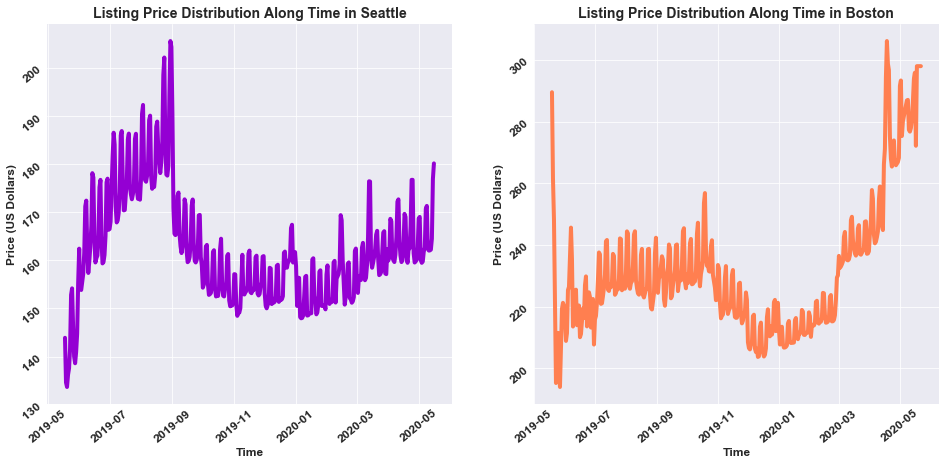

In [188]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.plot(calend_seat_clean,linewidth=4,color='darkviolet')
plt.xticks(fontsize=12,rotation=40,fontweight='bold')
plt.yticks(fontsize=12,rotation=40,fontweight='bold')
plt.title("Listing Price Distribution Along Time in Seattle",fontsize=14,fontweight='bold');
plt.xlabel("Time", fontsize=12, fontweight='bold');
plt.ylabel("Price (US Dollars)", fontsize=12, fontweight='bold');
plt.subplot(1,2,2);
plt.plot(calend_bost_clean,linewidth=4,color='coral')
plt.xticks(fontsize=12,rotation=40,fontweight='bold')
plt.yticks(fontsize=12,rotation=40,fontweight='bold')
plt.title("Listing Price Distribution Along Time in Boston",fontsize=14,fontweight='bold');
plt.xlabel("Time", fontsize=12, fontweight='bold');
plt.ylabel("Price (US Dollars)", fontsize=12, fontweight='bold');

### Let's Compare the prices in Boston and in Seattle

In [189]:
seat_prices = df_seat['price'].value_counts()
mean_price_seat = df_seat['price'].mean()

In [190]:
bost_prices = df_bost['price'].value_counts()
mean_price_bost = df_bost['price'].mean()

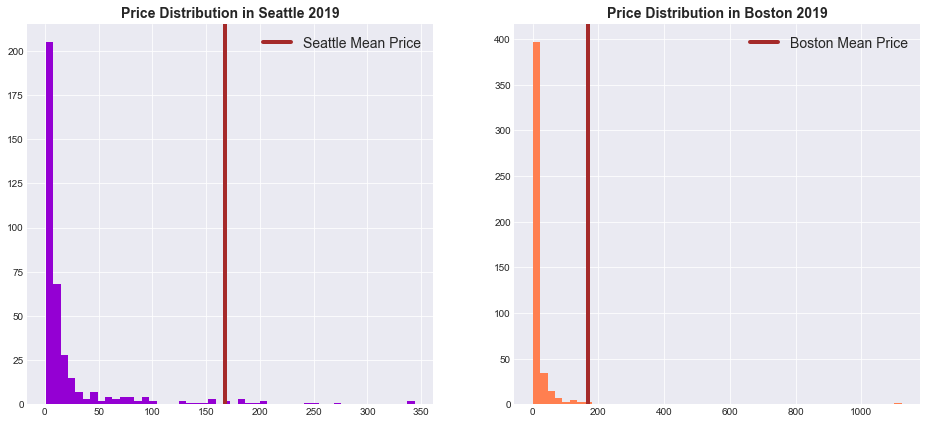

In [191]:
plt.figure(figsize=(16,7));
plt.subplot(1,2,1);
plt.hist(seat_prices,bins=50,color='darkviolet');
plt.axvline(mean_price_seat,color='brown',linewidth=4,label='Seattle Mean Price');
plt.legend(fontsize=14);
plt.title("Price Distribution in Seattle 2019",fontsize=14,fontweight='bold');
plt.subplot(1,2,2);
plt.hist(bost_prices,bins=50,color='coral');
plt.axvline(mean_price_seat,color='brown',linewidth=4,label='Boston Mean Price');
plt.legend(fontsize=14);
plt.title("Price Distribution in Boston 2019",fontsize=14,fontweight='bold');

### Q03) Is it possible to predict the price for a certain home in a certain city?

**Bellow I will be using the clean modeling dataset to predict the price of a listing. I will be using a Random Forest Regressor to make the predictions.**

**The following procedures will be used in this task:**

   - **Create features and target vectors (X and y, respectively)**
   - **Create a model pipeline that includes a scalor and the Random Forest Regressor**
   - **Create multiple scores for evaluating the model in a K-fold fashion**
   - **Create a randomized search amongst a set of parameters**

**Create features and target vectors (X and y, respectively)**

In [192]:
X_seat = df_seat.drop(columns=['id','price']).values
y_seat = df_seat['price'].values

X_bost = df_bost.drop(columns=['id','price']).values
y_bost = df_bost['price'].values

**Create a model pipeline that includes a scalor and the Random Forest Regressor**

In [193]:
pipeline = Pipeline([('scaler',StandardScaler()),
                     ('regressor', RandomForestRegressor())])

**Create multiple scores for evaluating the model in a K-fold fashion**

In [194]:
scoring = {'r2': make_scorer(r2_score,greater_is_better=True),
           'mdabse':'neg_median_absolute_error',
           'mabse':'neg_mean_squared_error'}

**Create a randomized search amongst a set of parameters**

In [195]:
param_dist = {'regressor__n_estimators':[500],
              'regressor__max_depth':[1,2,3,4,5,10,20],
              'regressor__min_samples_split':[2,3,4,5,10,20,30,50],
              'regressor__min_samples_leaf':[2,4,6,8,10,20,30,50]}

In [196]:
n_iter_search = 10

seat_clf = RandomizedSearchCV(pipeline,
                              param_distributions=param_dist,
                              n_iter=n_iter_search,
                              scoring=scoring,
                              refit='r2',
                              cv=5,
                              n_jobs=-1,
                              iid=False).fit(X_seat,y_seat)

In [207]:
seat_clf.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

**Saving Models**

In [197]:
from sklearn.externals import joblib
joblib.dump(seat_clf, 'seat_clf.pkl') 

['seat_clf.pkl']

**Evaluating Model Performance**

In [198]:
best_r2_seat = round(seat_clf.cv_results_['mean_test_r2'].max(),3)
best_mdabse_seat = round(-seat_clf.cv_results_['mean_test_mdabse'].max(),3)
best_mabse_seat = round(-seat_clf.cv_results_['mean_test_mabse'].max(),3)

In [199]:
print(f"Best R^2 Score Seattle: {best_r2_seat}")
print(f"Best Median Absolute Error Score Seattle: {best_mdabse_seat}")
print(f"Best Mean Squared Error Score Seattle: {best_mabse_seat}")

Best R^2 Score Seattle: 0.438
Best Median Absolute Error Score Seattle: 30.316
Best Mean Squared Error Score Seattle: 21834.174


### Q04) What characteristics are most related to prices changes?

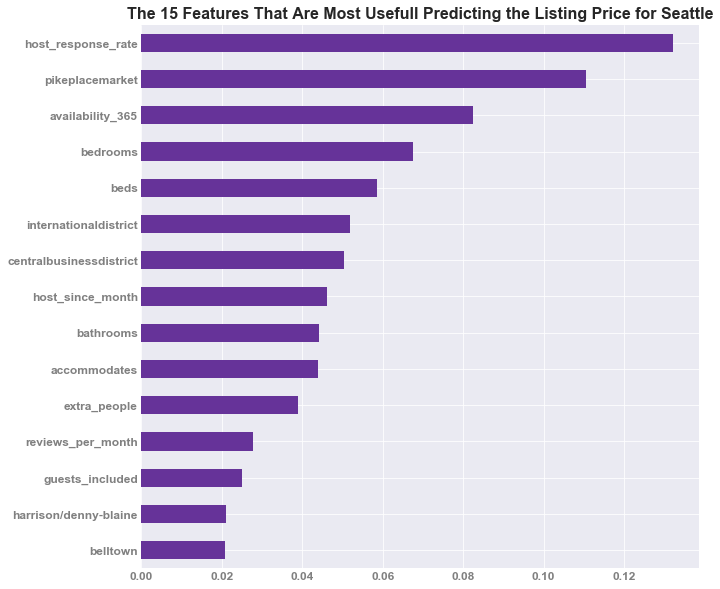

In [200]:
feat_imp_seat = seat_clf.best_estimator_.steps[1][1].feature_importances_
features_seat = df_seat.drop(columns=['id','price']).columns
feat_importances_seat = pd.Series(feat_imp_seat, 
                                  index=features_seat).sort_values(ascending=False)

plt.figure(figsize=(10,10))
feat_importances_seat.nlargest(15).plot(kind='barh',color='rebeccapurple')
plt.yticks(fontsize=12,fontweight='bold',color='gray')
plt.xticks(fontsize=12,fontweight='bold',color='gray')
plt.title("The 15 Features That Are Most Usefull Predicting the Listing Price for Seattle",fontsize=16,fontweight='bold')
plt.gca().invert_yaxis()

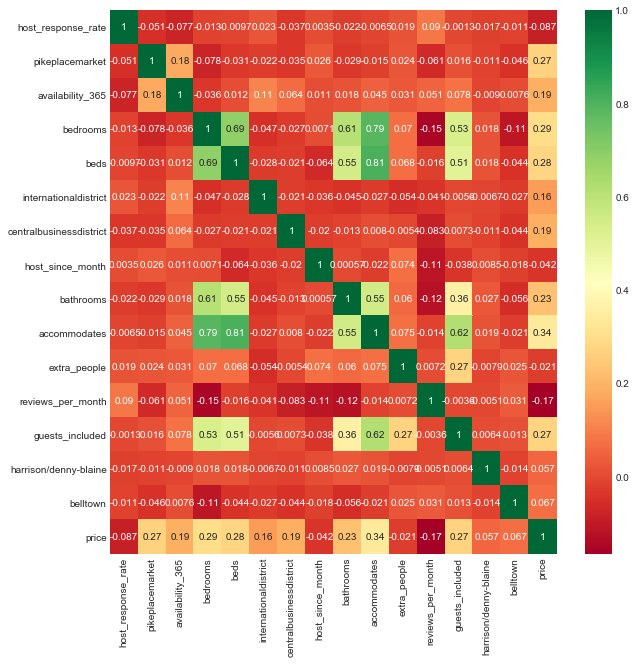

In [231]:
corr_data = df_seat[list(feat_importances_seat.head(15).index)+['price']]
corrmat = corr_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(corr_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Q05) What are the most common Amenities in both cities?

In [201]:
amenities_frequencies_seat.head(10)

wifi                         0.036167
essentials                   0.035993
heating                      0.035778
smoke_detector               0.034977
shampoo                      0.033601
kitchen                      0.033167
hangers                      0.032242
hair_dryer                   0.031568
carbon_monoxide_detector     0.030758
laptop_friendly_workspace    0.029693
Name: 0, dtype: float64

In [202]:
amenities_frequencies_bost.head(10)

wifi                        0.038824
heating                     0.038402
smoke_detector              0.038082
essentials                  0.037628
kitchen                     0.036317
carbon_monoxide_detector    0.035019
hangers                     0.034219
air_conditioning            0.032652
shampoo                     0.032512
hair_dryer                  0.032045
Name: 0, dtype: float64

### References:

[0] https://stackoverflow.com/questions/6486450/python-compute-list-difference